# Homework 2: U.S. Boundary Currents

Name: Trong Le

Date: Feb 3, 2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [97]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [98]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [99]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

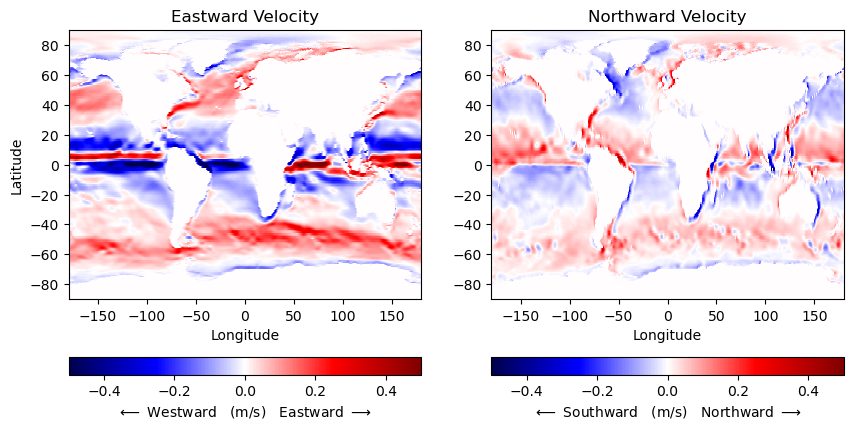

In [100]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east coast of the U.S.? the west coast?
    - 45$^{\circ}$N on the east coast of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1. Direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east coast of the U.S., currents flow roughly northward along the coast before turning eastward into the North Atlantic. The west coast currents flows southward, bringing cooler water from the north
    - 45$^{\circ}$N on the east coast of the U.S., currents move northward and eastward into the Atlantic. On the west coast, currents flow northward along the coast before turning westward
2. East coast current flows faster than west coast
3. These currents are part of the gyres in the North Atlantic and North Pacific.
   - On the east coast of the U.S., part of the North Atlantic Gyre, it flows northward along the coast, then turns eastward toward Europe. Then, it cools and flows southward as the completing the gyre.
   - On the west coast of the U.S., part of the North Pacific Gyre, it flows southward along the coast, turns westward, and then flows northward near Japan, completing the gyre. 

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [101]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [102]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

Text(0.5, 0, 'Longitude')

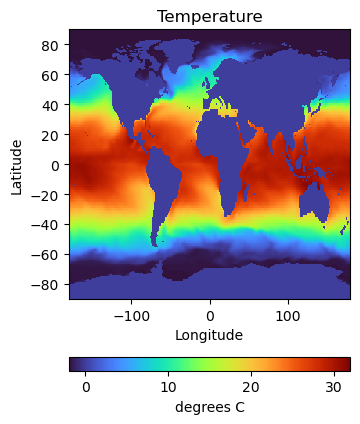

In [103]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,theta[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='degrees C' )
plt.title('Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The temperature on the west coast of the U.S. is cooler compared to the east coast at the same latitude
2. The ocean currents contribute to this temperature regime because, on the west coast of the U.S., it flows southward along the coast and brings cold water from Alaska, making it cooler, while on the east coast of the U.S., it flows northward along the coast and brings warmer water from equator. 

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [104]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')

In [105]:
# store the WVELSTAR grid into a into numpy array
wvelstar = np.array(ds_wvelstar['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [106]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
Zl = np.array(ds_wvelstar['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

-3.2632233342155814e-05
2.875943755498156e-05


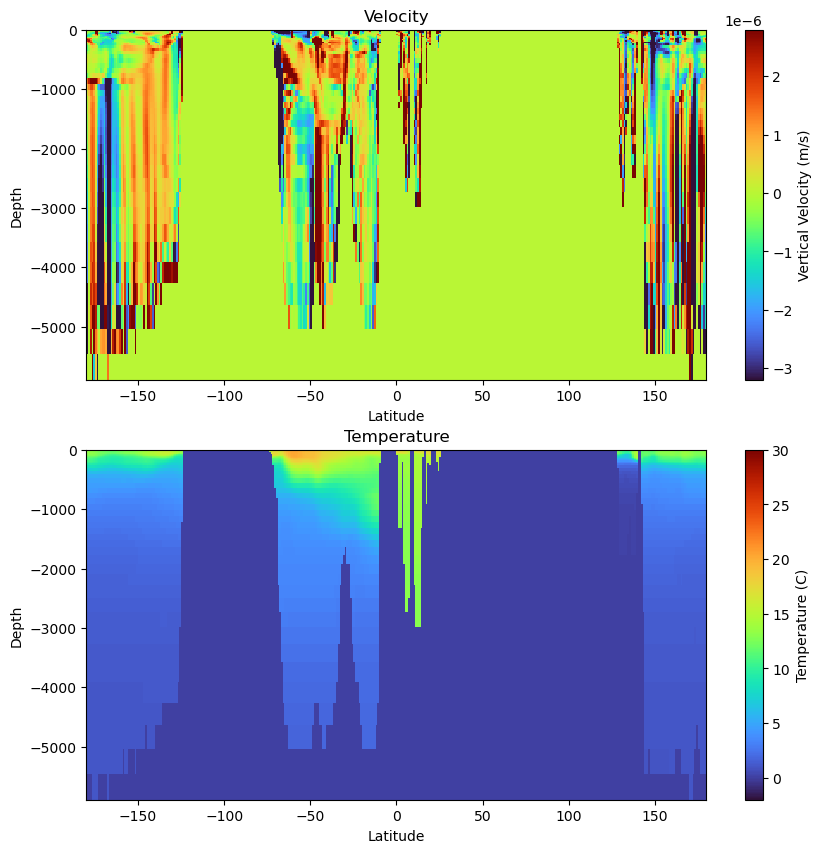

In [107]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
C = plt.pcolormesh(lon,Zl,wvelstar[0, :, 259, :], vmin = -3.2e-06, vmax = 2.8e-06, cmap='turbo')
plt.colorbar(C, label='Vertical Velocity (m/s)' )
plt.title('Velocity')
plt.ylabel('Depth')
plt.xlabel('Latitude');
data_min = wvelstar[0, :, 259, :].min()
data_max = wvelstar[0, :, 259, :].max()
print(data_min)
print(data_max)

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(lon,Zl,theta[0, :, 259, :], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Latitude');


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. The vertical velocity is stronger and more persistent on the west coast compared to the east coast (east coast is more pixelated)
2. The speed of vertical velocity is smaller compared to horizontal velocity. The forcing mechanisms associated with horizontal velocity such as wind and Coriolis effect. The forcing mechanisms associated with vertical velocity such as density, things such as underwater volcano, the Ekman
Spiral and upwelling that followed horizontal velocity 
3. When the vertical currents adjacent to the coastline contribute to the surface temperature by bringing the cooler water to the surface making the surface temperature cooler than others that are not or as strong. The example can be seen in the differences in surface temperature in east and west coast U.S.
4. On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. These winds contribute to the vertical velocity by make the Ekman Spiral stronger and increase the upwelling verical velocity (water from bottom need to replace the water got flow away on top)